In [ ]:
import pandas as pd
con = sqlite3.connect('data/cache.db')

occupations table
pd.read_sql("SELECT preferredLabel,altLabels,description FROM occupations",con)

tag table
pd.read_sql("SELECT occupation_id,labeler_id,task_id FROM tags",con)

task dat table 
pd.read_sql("SELECT project_name,_id,title,description FROM task_data",con)

In [ ]:
import datasets
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm

pipe = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h", device=0)
dataset = datasets.load_dataset("superb", name="asr", split="test")

# KeyDataset (only *pt*) will simply return the item in the dict returned by the dataset item
# as we're not interested in the *target* part of the dataset.
for out in tqdm(pipe(KeyDataset(dataset, "file"))):
    print(out)
    # {"text": "NUMBER TEN FRESH NELLY IS WAITING ON YOU GOOD NIGHT HUSBAND"}
    # {"text": ....}
    # ....

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 

In [26]:
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
import datasets

dataset = datasets.load_dataset("imdb", name="plain_text", split="unsupervised")
pipe = pipeline("text-classification", device=0)
for out in tqdm(pipe(KeyDataset(dataset, "text"), batch_size=32, truncation="only_first")):
    pass
    # print(out)
    # [{'label': 'POSITIVE', 'score': 0.9998743534088135}]
    # Exactly the same output as before, but the content are passed
    # as batches to the model

Reusing dataset imdb (/home/amir/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


  0%|          | 0/1563 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [31]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel, AutoModelForMaskedLM

sentences = ["This is an example sentence", "Each sentence is converted with something interesting"]

# model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
model = AutoModelForMaskedLM.from_pretrained("asafaya/bert-base-arabic")
# pipe = pipeline("asafaya/bert-base-arabic", model="asafaya/bert-base-arabic", device=0)

tokens = tokenizer(sentences[1], return_tensors="pt")
print(tokens)
out = model(**tokens)
out = out.logits.data.numpy()

# embeddings = model.encode(sentences)
# print(embeddings)

{'input_ids': tensor([[    2,    47,  9032,  7213, 12917, 17683,  3679,  9255,  7330, 15361,
          1074,  6693,    61, 10037,  5821,  3204, 10061,  4338,  3204,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


array([[[ -1.972018  ,  14.781503  ,  -3.586012  , ...,   1.3136039 ,
          -1.6224198 ,  -1.6780432 ],
        [ -5.686367  ,   9.5661955 ,  -8.419441  , ...,  -7.5665393 ,
          -6.825471  ,  -7.1409874 ],
        [ -4.107845  ,  10.449237  ,  -7.9090214 , ...,  -0.50974387,
          -5.541414  ,  -4.8066306 ],
        ...,
        [ -5.4927635 ,   5.586585  , -11.824484  , ...,  -7.250341  ,
          -5.940538  ,  -2.9555728 ],
        [ -1.779465  ,  12.610941  ,  -6.9550066 , ...,  -2.1783466 ,
          -2.9957082 ,  -0.07241631],
        [ -1.3348647 ,  14.909911  ,  -4.6755667 , ...,   0.02915353,
          -0.63688076,  -0.38457522]]], dtype=float32)

In [32]:
out.shape, sentences[0]

((1, 20, 32000), 'This is an example sentence')

In [66]:
import sqlite3
import pandas as pd
con = sqlite3.connect('../dashboard/data/cache.db')

tasks = pd.read_sql("SELECT * FROM task_data WHERE project_name LIKE 'SAU%'",con)
tags = pd.read_sql("""
SELECT * FROM tags
WHERE task_id IN (SELECT _id FROM task_data WHERE project_name LIKE 'SAU%')
""",con)
classes = pd.read_sql("SELECT * FROM occupations WHERE lang='ar'",con)
classes

,index,conceptType,conceptUri,iscoGroup,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,regulatedProfessionNote,scopeNote,definition,inScheme,description,lang,esco_version
0,0,Occupation,http://data.europa.eu/esco/occupation/00030d09...,2166,المدير الفني / المديرة الفنية,None,None,released,2016-07-05T13:58:41Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/occu...,None,ar,v1.0.3
1,1,Occupation,http://data.europa.eu/esco/occupation/000e93a3...,8121,مشغل آلة تشكيل المعادن / مشغلة آلة تشكيل المعادن,None,None,released,2016-07-05T17:09:43Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/memb...,None,ar,v1.0.3
2,2,Occupation,http://data.europa.eu/esco/occupation/0019b951...,7543,مفتش أجهزة الدقة / مفتشة أجهزة الدقة,None,None,released,2016-07-06T09:21:20Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/occu...,None,ar,v1.0.3
3,3,Occupation,http://data.europa.eu/esco/occupation/0022f466...,3155,فني سلامة الحركة الجوية,None,None,released,2017-01-17T11:40:37Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/memb...,None,ar,v1.0.3
4,4,Occupation,http://data.europa.eu/esco/occupation/002da35b...,2431,مدير إيرادات الضيافة / مديرة إيرادات الضيافة,None,None,released,2017-01-17T13:33:42Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/memb...,None,ar,v1.0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,2937,Occupation,http://data.europa.eu/esco/occupation/ff656b3a...,2120,عالم في إحصاء السكان / عالمة في إحصاء السكان,None,None,released,2016-07-05T16:21:57Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/occu...,None,ar,v1.0.3
2938,2938,Occupation,http://data.europa.eu/esco/occupation/ff8d4065...,9612,عامل الفرز / عاملة الفرز,None,None,released,2017-01-17T13:22:45Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/memb...,None,ar,v1.0.3
2939,2939,Occupation,http://data.europa.eu/esco/occupation/ffa4dd5d...,5414,حارس السيارات المصفحة / حارسة السيارات المصفحة,None,None,released,2016-12-22T10:57:58Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/memb...,None,ar,v1.0.3
2940,2940,Occupation,http://data.europa.eu/esco/occupation/ffade2f4...,2422,مسؤول إداري في الخدمة المدنية / مسؤولة إداري ف...,None,None,released,2016-07-05T16:17:26Z,http://data.europa.eu/esco/regulated-professio...,None,None,http://data.europa.eu/esco/concept-scheme/occu...,None,ar,v1.0.3


In [53]:
import tqdm
classes['concat'] = classes.apply(lambda x: f"""
{x.preferredLabel} 
{x.description}
""",axis=1)
tasks['concat'] = tasks.apply(lambda x: f"{x.title} {x.title} {x.title} {x.description}",axis=1)
# embeddings = model.encode(tasks.concat.values)
# class_embeddings = model.encode(classes.concat.values)
embeddings = [model(**tokenizer(token,  return_tensors="pt")) for token in tqdm.tqdm(tasks.concat.values,total=len(tasks))] 
class_embeddings = [model(**tokenizer(token,  return_tensors="pt")) for token in tqdm.tqdm(classes.concat.values,total=len(classes))] 
normalize = lambda E: (E.transpose() / np.sqrt(np.sum(E**2,axis=1))).transpose()
prods = normalize(class_embeddings) @ normalize(embeddings).transpose()
NN = prods.argsort(0).transpose()[:,::-1]
occ_ids = classes.occupation_id.values
occ_NN = [occ_ids[nn] for nn in NN]
tasks['occ_NN'] = occ_NN



  0%|                                                                                                                                                                                                                                                     | 0/5044 [00:00<?, ?it/s]

  0%|                                                                                                                                                                                                                                             | 1/5044 [00:00<10:32,  7.97it/s]

  0%|                                                                                                                                                                                                                                             | 2/5044 [00:00<11:32,  7.28it/s]

  0%|▏                                                                                                                                                                 

RuntimeError: The size of tensor a (610) must match the size of tensor b (512) at non-singleton dimension 1

,project_name,_id,title,description
0,GB,61dd90f7ce271774889fbc03,Pickers,Our prestigious client based in Crewe is looki...
1,GB,61dd90f7ce271774889fbc04,Senior Quantity Surveyor,A high profile joint venture consisting of som...
2,GB,61dd90f7ce271774889fbc05,Home Care Assistant,Care Assistants are employed directly by an in...
3,GB,61dd90f8ce271774889fbc06,Social Care Worker,Care Workers support people with all aspects o...
4,GB,61dd90f8ce271774889fbc07,Senior Acoustics Consultant - London,My client is a global multidisciplinary consul...
...,...,...,...,...
48251,test GBR3,620c561531c2e695f2d260a1,Sales Support Team Leader,Our prestigious client based in Theale are loo...
48252,test GBR3,620c561531c2e695f2d260a2,Adjusting Executive - Specialty - Construction...,The 'Apply with SEEK' option will be utilized ...
48253,test GBR3,620c561531c2e695f2d260a3,Credit Controller,A great opportunity for a credit controller lo...
48254,test GBR3,620c561531c2e695f2d260a4,Plumber Water Hygiene,"Plumber Water Hygiene- Croydon Salary; - £26,0..."


In [50]:
import numpy as np
i = np.random.randint(len(tasks))
i = 260
print(tasks.description.iloc[i])
for j in NN[i,:5]:
    tag = classes.iloc[j]
    print(f"-> {tag.title}, {tag.description}\n")

تقديم وبيع منتجات الشركة وخدماتها للعملاء الحاليين والمحتملين\nالـتأكد من المظهر الأنيق والمنظم لواجهات المعرض ورفوفالعرض عن طريق تنظيم وإعادة ترتيب البضائع حسب مبادئ الشركة\nالمعرفة التامة بالمنتج ومواصفاته ومهامه كيفية استخدامه\nترتيب البضائع وتنظيمها\n العمل على سلامة وجودة المنتجات وحفظها من السرقة\n توفير المعلومات عن المنتجات للعملاء بما في ذلك السعر والموقع والحجم واللون…\n الرد على الاستفسارات بطريقة واعية ومهذبة. الرد على المكالمات الهاتفية بأدب وتقديم المعلومات المطلوبة للمتصلين\n المحافظة على المخزن بشكل صحيح وبدقة في جميع الأوقات وفقا لإجراءات المخزن


NameError: name 'NN' is not defined

In [306]:
task_ids = tags.task_id.unique()
task_id = task_ids[np.random.randint(len(task_ids))]
chosen_occupations = tags.loc[tags.task_id==task_id].occupation_id.values
predicted_occupations = tasks.loc[tasks._id==task_id].occ_NN.iloc[0]

[np.nonzero(predicted_occupations==int(c))[0][0] for c in chosen_occupations]

[320, 1317, 549, 549]

In [287]:
tags['pred_rank'] = tags.apply(lambda x: np.nonzero(tasks.loc[tasks._id==x.task_id].occ_NN.iloc[0]==int(x.occupation_id))[0], axis=1)

df = tags.loc[tags.pred_rank.apply(len)>0]

df.pred_rank = df.pred_rank.apply(lambda x: x[0])


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

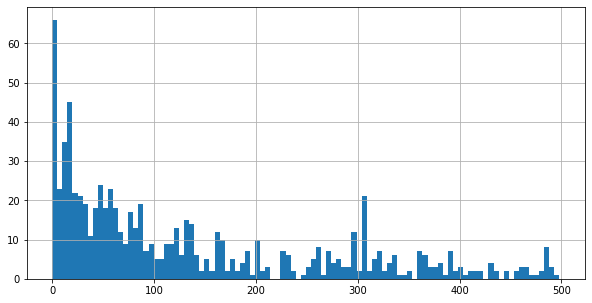

In [298]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df.loc[df.pred_rank<500].pred_rank.hist(bins=100)

In [302]:
(df.pred_rank<10).mean()

0.09299895506792058

In [307]:
tasks.loc[tasks._id==task_id]

,_id,project_name,project_id,created_at,status,task-type,total_labels,updated_at,description,title,occ_NN,concat
260,61dde40e527776b760a860a4,GBR,61dde40a527776b760a85f9f,"Tue, 11 Jan 2022 20:09:50 GMT",in-progress,esco-text-tagging,2,"Tue, 11 Jan 2022 20:09:50 GMT",Great opportunity to work as a Production Oper...,Production Operatives Nights - Earn up to £14....,"[1626, 689, 1323, 1925, 227, 2590, 1451, 1496,...",Production Operatives Nights - Earn up to £14....


In [352]:
import re
# re.split('; |, ',str)
classes_text = classes.apply(lambda x: f"""
{x.title} 
{', '.join(x.alternates if x.alternates else '')} 
{x.description}
""",axis=1)
tasks_text = tasks.apply(lambda x: f"{x.title}\n{x.description}",axis=1)
sentences = [{'i': i,'sentence':s.strip(),'source': source} 
             for source,corpus in [('tasks',tasks_text),('classes',classes_text)] 
             for i,text in enumerate(corpus) 
             for s in re.split(r'[!.\n\r]+',text) if len(s)>10]
sentences = pd.DataFrame(sentences)
embeddings = model.encode(sentences.sentence.values)
embeddings = normalize(embeddings)
em_task = embeddings[sentences.source=='tasks']
em_class = embeddings[sentences.source=='classes']


<AxesSubplot:>

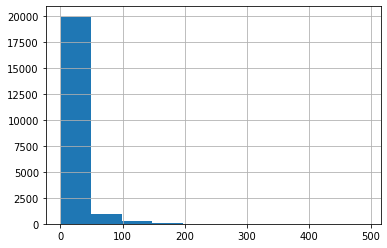

In [363]:
sentences.sentence.apply(lambda x: len(x.split())).hist()

In [378]:
NN = (em_task @ em_class.transpose()).argsort(0).transpose()[:,::-1]

In [411]:
occ_ids = classes.occupation_id.iloc[sentences.loc[sentences.source=='classes'].i].values
task_ids = tasks._id.iloc[sentences.loc[sentences.source=='tasks'].i].values
NN.shape, occ_ids.shape, task_ids.shape

((12632, 8591), (12632,), (8591,))

In [412]:
tag = tags.iloc[0]
task_id, occupation_id = tag.task_id, tag.occupation_id

In [88]:
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/amir/mlcheap-services/ml-backend
